In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [2]:
import pandas as pd

Baseline

In [3]:
import os

os.listdir('/content/drive/MyDrive/W266FinalProject/test_candidates/')

['t5_all_categories_finetuned.csv',
 'bart_all_categories_finetuned.csv',
 'bart_tech_finetuned.csv',
 't5_tech_finetuned.csv',
 't5_all_categories_base.csv',
 't5_tech_base.csv',
 'baseline_all_categories.csv',
 'baseline_tech_all_categories.csv',
 'bert_all_categories.csv',
 'bert_tech.csv',
 'bart_all_categories_base.csv',
 'bart_tech_base.csv',
 'for_scoring']

In [4]:
baseline = pd.read_csv('/content/drive/MyDrive/W266FinalProject/test_candidates/baseline_all_categories.csv')
baseline = baseline.rename(columns={'Unnamed: 0': 'id'})
baseline['model_id'] = 3
baseline = baseline.head(10)


In [5]:
t5_base = pd.read_csv('/content/drive/MyDrive/W266FinalProject/test_candidates/t5_all_categories_base.csv')
t5_base = t5_base.rename(columns={'Unnamed: 0': 'id'})
t5_base['model_id'] = 2
t5_base = t5_base.head(10)

In [6]:
t5_finetune = pd.read_csv('/content/drive/MyDrive/W266FinalProject/test_candidates/t5_all_categories_finetuned.csv')
t5_finetune = t5_finetune.rename(columns={'Unnamed: 0': 'id'})
t5_finetune['model_id'] = 4
t5_finetune = t5_finetune.head(10)

In [7]:
bart_base = pd.read_csv('/content/drive/MyDrive/W266FinalProject/test_candidates/bart_all_categories_base.csv')
bart_base = bart_base.rename(columns={'Unnamed: 0': 'id'})
bart_base['model_id'] = 1
bart_base = bart_base.head(10)

In [8]:
bart_finetune = pd.read_csv('/content/drive/MyDrive/W266FinalProject/test_candidates/bart_all_categories_finetuned.csv')
bart_finetune = bart_finetune.rename(columns={'Unnamed: 0': 'id'})
bart_finetune['model_id'] = 5
bart_finetune = bart_finetune.head(10)

In [9]:
bert = pd.read_csv('/content/drive/MyDrive/W266FinalProject/test_candidates/bert_all_categories.csv')
bert = bert.rename(columns={'Unnamed: 0': 'id'})
bert['model_id'] = 6
bert = bert.head(10)

In [11]:
dfs = pd.concat([baseline, t5_base, t5_finetune, bart_base, bart_finetune, bert])

Save off candidates for scoring

In [ ]:
dfs = dfs.drop(columns=['rouge1','rouge2','rogueL','rogueLs','chrf'])
dfs.to_csv('/content/drive/MyDrive/W266FinalProject/test_candidates/for_scoring/candidates_for_scoring.csv', index=False)

# Read in scores

In [12]:
import os

os.listdir('/content/drive/MyDrive/W266FinalProject/test_candidates/for_scoring')

['candidates_for_scoring.csv',
 'kt_candidates_for_scoring.csv',
 'arisa_candidates_for_scoring.csv']

In [32]:
kt_df = pd.read_csv('/content/drive/MyDrive/W266FinalProject/test_candidates/for_scoring/kt_candidates_for_scoring.csv')
kt_df = kt_df.drop(columns=['Unnamed: 0'])
kt_df = kt_df.rename(columns={'score': 'kt_score'})

kt_df = kt_df.drop(columns=['target', 'candidate'])

In [35]:
arisa_df = pd.read_csv('/content/drive/MyDrive/W266FinalProject/test_candidates/for_scoring/arisa_candidates_for_scoring.csv')
arisa_df = arisa_df.drop(columns=['Unnamed: 0'])
arisa_df = arisa_df.rename(columns={'score': 'arisa_score'})

arisa_df = arisa_df.drop(columns=['target', 'candidate', 'Word Count Candidate'])

In [33]:
kt_df.head(n=2)

,id,model_id,kt_score
0,0,1,2
1,0,2,4


In [36]:
arisa_df.head(n=2)

,id,model_id,arisa_score
0,0,3,3
1,1,3,3


In [81]:
scores_df = pd.merge(kt_df,arisa_df,right_on=['id','model_id'],left_on=['id','model_id'])
scores_df = pd.merge(scores_df,dfs,right_on=['id','model_id'],left_on=['id','model_id'])

scores_df = scores_df.rename(columns={'rogueL': 'rougeL', 'rogueLs': 'rougeLs'})

In [85]:
scores_df['joined_score'] = scores_df['arisa_score'] + scores_df['kt_score']

In [86]:
scores_df.to_csv('/content/drive/MyDrive/W266FinalProject/test_candidates/for_scoring/final_scores.csv')

In [101]:
models = {1: 'BART Base', 2: 'T5 Base', 3: 'Baseline', 4: 'T5 Finetuned',
          5: 'BART Finetuned', 6: 'BERT'
}

<ipython-input-152-fa44562b5701>:10: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  plt.subplots_adjust(hspace=1)


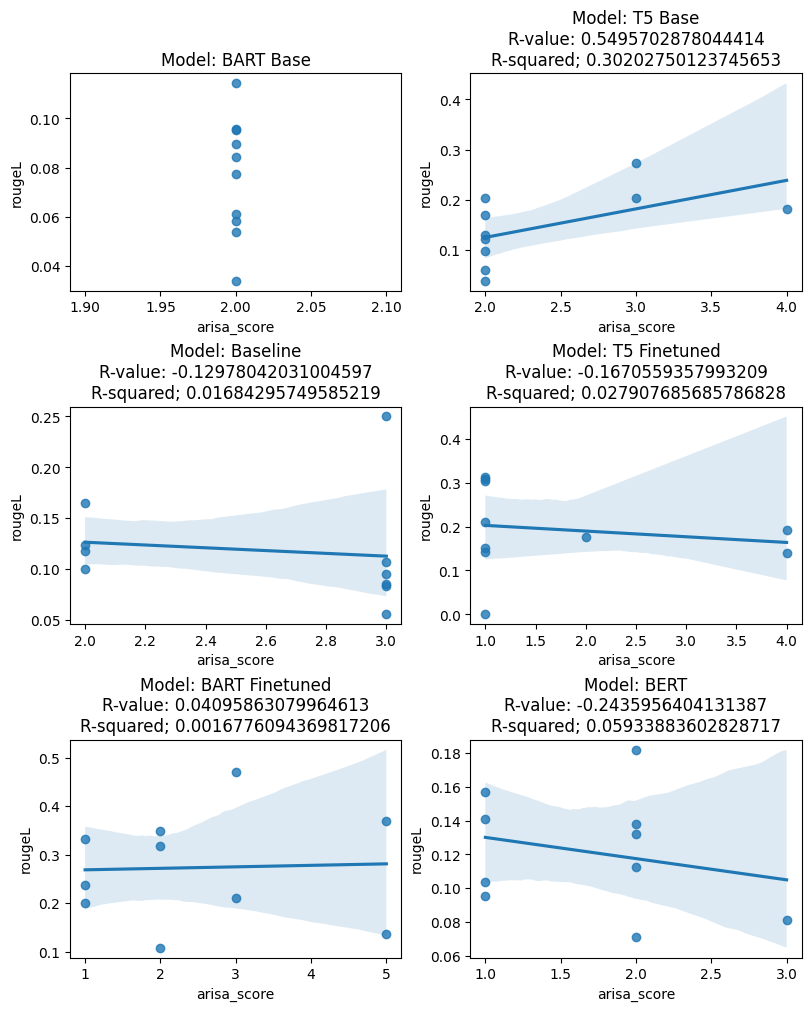

In [152]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

col1 = "arisa_score"
col2 = "rougeL"

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(8, 10),constrained_layout=True)

plt.subplots_adjust(hspace=1)

model = 1
for i, ax in enumerate(axes.flat):
# for model in range(1,7):
  sub_df = scores_df[scores_df['model_id']==model]
  try:
    # Calculate R-squared value
    slope, intercept, r_value, p_value, std_err = stats.linregress(sub_df[col1], sub_df[col2])
    r_squared = r_value ** 2

    title = f'Model: {models[model]}'
    # Print R-squared value
    title += f"\nR-value: {r_value}"
    title += f"\nR-squared; {r_squared}"

    ax.set_title(title)
    # Create regression plot with seaborn
    sns.regplot(x=col1, y=col2, data=sub_df, ax=ax)
  except:
    title = f'Model: {models[model]}'
    ax.set_title(title)
    # Create regression plot with seaborn
    sns.regplot(x=col1, y=col2, data=sub_df, ax=ax)

  model += 1

# Show the plot
plt.show()


In [153]:
fig.savefig(f'/content/drive/MyDrive/W266FinalProject/test_candidates/for_scoring/{col1}_{col2}_figure_scores.png')

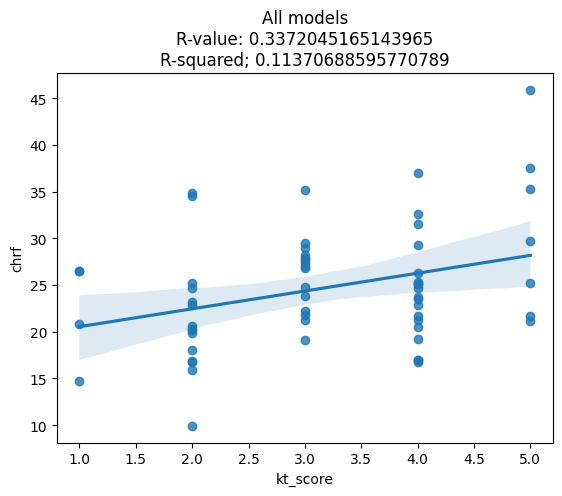

In [169]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
col1 = "kt_score"
col2 = "chrf"

# Calculate R-squared value
slope, intercept, r_value, p_value, std_err = stats.linregress(scores_df[col1], scores_df[col2])
r_squared = r_value ** 2

title = f'All models'
# Print R-squared value
title += f"\nR-value: {r_value}"
title += f"\nR-squared; {r_squared}"

# Create regression plot with seaborn
sns.regplot(x=col1, y=col2, data=scores_df).set(title=title)

# Show the plot
plt.show()


In [ ]:
fig.savefig(f'/content/drive/MyDrive/W266FinalProject/test_candidates/for_scoring/{col1}_{col2}_allmodels_figure_scores.png')